In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Regression

In [96]:
np.random.seed(0)
m = 100
X = np.linspace(0, 10, m).reshape(m,1)
y = X**2 + np.random.randn(m,1)

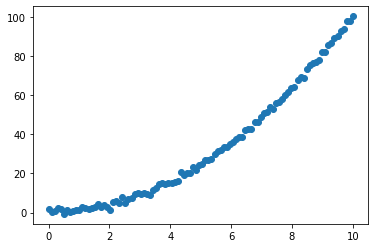

In [97]:
plt.scatter(X,y)

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

C:\Users\Toufik\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


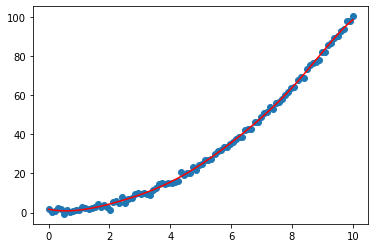

In [99]:
model = SVR(C=100)
model.fit(X,y)
model.score(X,y)

predictions = model.predict(X)

plt.scatter(X,y)
plt.plot(X,predictions, c='r')

# Classification

In [100]:
titanic = sns.load_dataset('titanic')
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [101]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0,1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
model = KNeighborsClassifier()

In [104]:
y = titanic['survived']
X = titanic.drop(['survived'], axis=1)

In [105]:
model.fit(X,y)
model.score(X,y)

0.8319327731092437

In [106]:
def survie(model, pclass=3, sex=0, age=23):
    x = np.array([pclass, sex, age]).reshape(1,3)
    print(model.predict(x))
    print(model.predict_proba(x))

In [107]:
survie(model)

[0]
[[1. 0.]]


# Exercice

In [108]:
def meilleur_KN():
    scores = []
    for i in range(1, 11):
        model = KNeighborsClassifier(i)
        y = titanic['survived']
        X = titanic.drop(['survived'], axis=1)
        model.fit(X,y)
        scores.append(model.score(X,y))
    
    print(scores)
    return scores.index(max(scores))
        

In [109]:
meilleur_KN()

[0.8473389355742297, 0.8585434173669467, 0.8585434173669467, 0.8403361344537815, 0.8319327731092437, 0.8221288515406162, 0.8207282913165266, 0.8109243697478992, 0.8179271708683473, 0.8053221288515406]


1

# Train_test_split

In [110]:
from sklearn.datasets import load_iris

(150, 4)


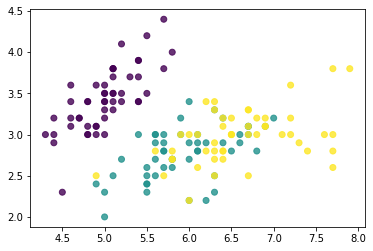

In [111]:
iris = load_iris()

X = iris.data
y = iris.target

print(X.shape)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8)

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


Text(0.5, 1.0, 'Test set')

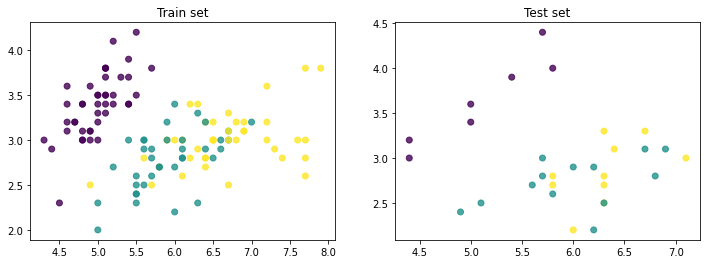

In [114]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, alpha=0.8)
plt.title('Test set')

In [115]:
from sklearn.neighbors import KNeighborsClassifier

In [116]:
model = KNeighborsClassifier(n_neighbors=1)

model.fit(x_train, y_train)
print('Train score : ', model.score(x_train, y_train))
print('Test score : ', model.score(x_test, y_test))

Train score :  1.0
Test score :  0.9333333333333333


# Cross validation

In [117]:
from sklearn.model_selection import cross_val_score

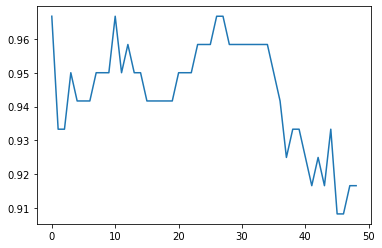

In [118]:
val_score = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k), x_train, y_train, cv=5, scoring='accuracy').mean()
    val_score.append(score)
    
plt.plot(val_score)

# Validation Curve

In [119]:
from sklearn.model_selection import validation_curve

C:\Users\Toufik\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


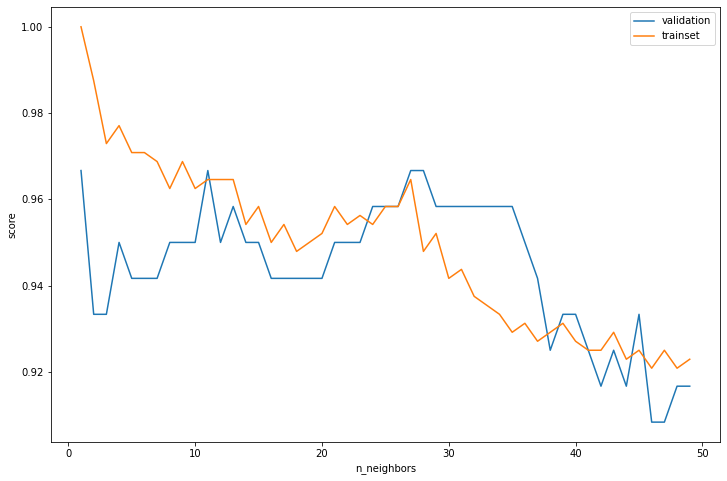

In [125]:
model = KNeighborsClassifier()
k = np.arange(1,50)

train_score, val_score = validation_curve(model, x_train, y_train, 'n_neighbors', k, cv=5)

plt.figure(figsize=(12,8))
plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='trainset')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

# GridSearchCV

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
param_grid = {'n_neighbors' : np.arange(1,20),
             'metric' : ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [128]:
grid.best_score_

0.9666666666666668

In [129]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 11}

In [130]:
model = grid.best_estimator_

In [131]:
model.score(x_test, y_test)

1.0

In [132]:
from sklearn.metrics import confusion_matrix

In [133]:
confusion_matrix(y_test, model.predict(x_test))

array([[ 7,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 10]], dtype=int64)

# Learning_curve

In [134]:
from sklearn.model_selection import learning_curve

[19 38 57 76 96]


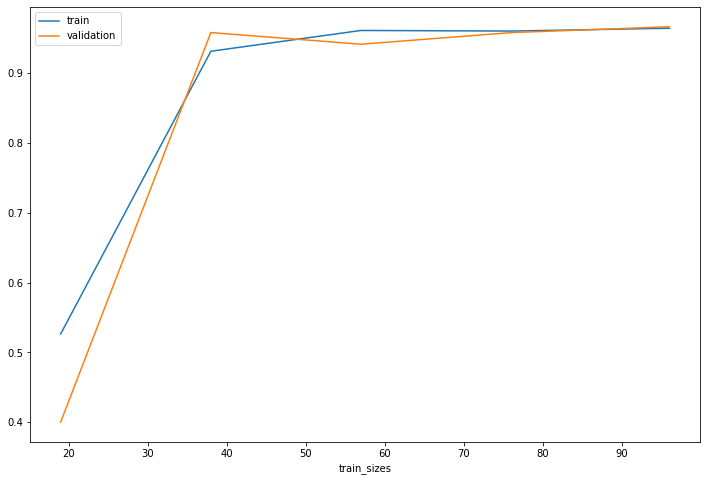

In [140]:
N, train_score, val_score = learning_curve(model, x_train, y_train, train_sizes = np.linspace(0.2,1.0, 5), cv=5)

print(N)
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()